In [10]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split




In [11]:

base_path = './ACNE'  
output_path = './preprocessed_data'
folders = ['cyst', 'comedo', 'pustule']  # The three acne categories
img_size = (224, 224)  # Resize images to 224x224

def create_output_folders(output_path, folders):
    """Create the folder structure for preprocessed data if it doesn't exist."""
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    for folder in folders:
        folder_path = os.path.join(output_path, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)


def preprocess_and_save_images(base_path, output_path, folders, img_size):
    """Load images, resize, normalize, and save them in preprocessed folders."""
    for folder in folders:
        source_folder = os.path.join(base_path, folder)
        dest_folder = os.path.join(output_path, folder)
        
        for filename in os.listdir(source_folder):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Load only image files
                try:
                    # Load the image
                    img_path = os.path.join(source_folder, filename)
                    img = cv2.imread(img_path)
                    
                    if img is None:
                        print(f"Warning: Unable to load image {img_path}")
                        continue

                    # Step 1: Resize the image
                    img = cv2.resize(img, img_size)
                    
                    # Step 2: Normalize the image to [0, 1]
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    
                    # Step 3: Convert back to uint8 for saving (scale back to 0-255)
                    img = (img * 255).astype(np.uint8)  # Convert to uint8 for saving

                    # Step 4: Save the processed image
                    save_path = os.path.join(dest_folder, filename)
                    cv2.imwrite(save_path, img)
                    print(f"Processed and saved image: {save_path}")
                    
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

In [6]:
if __name__ == '__main__':
    # Step 1: Create the folder structure
    print("Creating output folders for preprocessed images...")
    create_output_folders(output_path, folders)
    
    # Step 2: Preprocess and save images
    print("Preprocessing and saving images...")
    preprocess_and_save_images(base_path, output_path, folders, img_size)
    
    print("All images have been preprocessed and saved in the preprocessed_data/ folder.")

Creating output folders for preprocessed images...
Preprocessing and saving images...
Processed and saved image: ./preprocessed_data\cyst\cyst-1.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-10.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-100.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1000.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1001.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1002.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1003.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1004.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1005.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1006.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1007.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1008.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-1009.jpg
Processed and saved image: ./preprocessed_data\cyst\cyst-101.j

In [7]:
import os
import random
import shutil

input_path = './preprocessed_data'
output_path = './dataset'

# Create folder structure
def create_folder_structure(base_path):
    for split in ['train', 'val', 'test']:
        for folder in ['cyst', 'comedo', 'pustule']:
            split_folder = os.path.join(base_path, split, folder)
            if not os.path.exists(split_folder):
                os.makedirs(split_folder)

# Split images into train, val, test (70%, 15%, 15%)
def split_images(input_path, output_path):
    for folder in ['cyst', 'comedo', 'pustule']:
        image_files = [f for f in os.listdir(os.path.join(input_path, folder)) if f.endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(image_files)
        
        train_split = int(0.7 * len(image_files))
        val_split = int(0.85 * len(image_files))  # 70% + 15%

        train_files = image_files[:train_split]
        val_files = image_files[train_split:val_split]
        test_files = image_files[val_split:]
        
        for split, file_list in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
            for filename in file_list:
                src = os.path.join(input_path, folder, filename)
                dest = os.path.join(output_path, split, folder, filename)
                shutil.copy(src, dest)

if __name__ == '__main__':
    print("Creating dataset folder structure...")
    create_folder_structure(output_path)
    print("Splitting images into train, val, and test sets...")
    split_images(input_path, output_path)
    print("Data split complete.")


Creating dataset folder structure...
Splitting images into train, val, and test sets...
Data split complete.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1️⃣ Define the CNN model
def build_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),  # Normalize activations
        MaxPooling2D(pool_size=(2, 2)),  # Reduce dimensions
        Dropout(0.25),  # Dropout to prevent overfitting

        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),  # Normalize activations
        MaxPooling2D(pool_size=(2, 2)),  # Reduce dimensions
        Dropout(0.3),  # Dropout to prevent overfitting

        # Convolutional Layer 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),  # Normalize activations
        MaxPooling2D(pool_size=(2, 2)),  # Reduce dimensions
        Dropout(0.4),  # Dropout to prevent overfitting

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(256, activation='relu'),  # 256 neurons
        Dropout(0.5),  # High dropout to prevent overfitting
        BatchNormalization(),

        # Final Classification Layer
        Dense(num_classes, activation='softmax')  # 3 classes (cyst, comedo, pustule)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [19]:
# 3️⃣ Load the data without augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image to [0, 1]
    validation_split=0.2  # 20% validation split
)

# Load training data (NO AUGMENTATION)
train_generator = datagen.flow_from_directory(
    'dataset/train',  # Replace with the actual path
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

# Load validation data (NO AUGMENTATION)
val_generator = datagen.flow_from_directory(
    'dataset/train',  # Replace with the actual path
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)


Found 5746 images belonging to 3 classes.
Found 1435 images belonging to 3 classes.


In [20]:
# Build the CNN model
model = build_cnn_model()

# 4️⃣ Train the model
history = model.fit(
    train_generator,
    epochs=100,  # Number of epochs (you can increase if needed)
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // 32, 
    validation_steps=val_generator.samples // 32
)

# 5️⃣ Save the trained model
model.save('acne_cnn_model.h5')

c:\Users\Hammad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Hammad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - accuracy: 0.5942 - loss: 1.0591 - val_accuracy: 0.4538 - val_loss: 1.0939
Epoch 2/100
  1/179 ━━━━━━━━━━━━━━━━━━━━ 9:31 3s/step - accuracy: 0.5938 - loss: 0.7953

c:\Users\Hammad\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5938 - loss: 0.7953 - val_accuracy: 0.2963 - val_loss: 1.2033
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.7049 - loss: 0.6995 - val_accuracy: 0.4524 - val_loss: 1.1997
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6562 - loss: 0.9369 - val_accuracy: 0.3704 - val_loss: 2.0984
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.7087 - loss: 0.6702 - val_accuracy: 0.2379 - val_loss: 1.9417
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8438 - loss: 0.5558 - val_accuracy: 0.1481 - val_loss: 1.4727
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.7379 - loss: 0.5980 - val_accuracy: 0.5618 - val_loss: 1.3612
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7188 - loss: 0.5911 - val_accuracy: 0.5926 - val_loss: 1.5789
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.7709 - loss: 0.5474 - val_accuracy: 0.

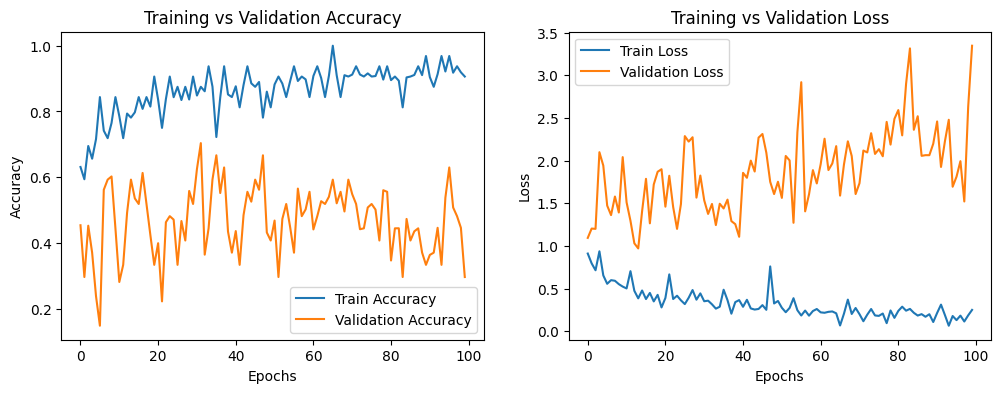

In [21]:
# 6️⃣ Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

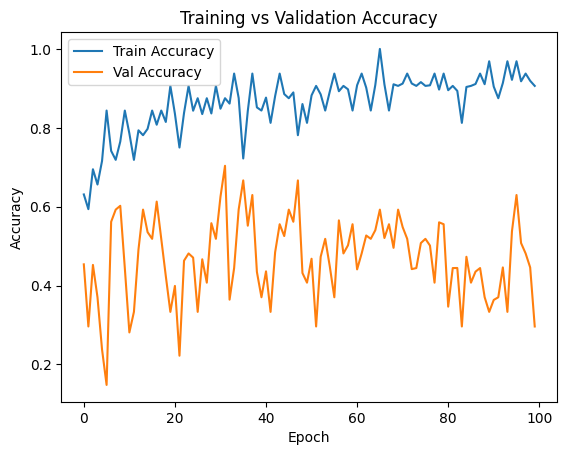

In [22]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [23]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('acne_cnn_model.h5')
print("Model loaded successfully!")

Model loaded successfully!


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_path = './dataset/test'
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test data from the "test" folder
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle so predictions match image names
)


Found 1540 images belonging to 3 classes.


In [25]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 605ms/step - accuracy: 0.7654 - loss: 0.7823
Test Loss: 1.0213011503219604, Test Accuracy: 0.7383117079734802


In [2]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.resize(img, (224, 224))  # Resize to model input size
    img = img / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 224, 224, 3)
    return img

In [30]:
image_path = './test.jpg'  # Path to your test image
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)
print(prediction)
predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
class_labels = ['cyst', 'comedo', 'pustule']

print(f"Predicted class: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[2.5454239e-04 9.9971181e-01 3.3581095e-05]]
Predicted class: comedo
